# **Author:** Jakiel   
# **Date:** 11/12/25
## Goal : The goal of this project is to determine if machine learning could predict whether an NBA player would be a viable "MVP Candidate" defined as receiving at least one MVP vote.

# Section 1. Import and Inspect the Data


In [86]:
# importing necessary libraries

# Reflection 1: What do you notice about the dataset? Are there any data issues?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

 

In [87]:
# 1.1 Load the dataset and display the first 10 rows.
NBA = pd.read_csv('NBA_Dataset.csv')
NBA.head(10)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
5,1982,Dennis Awtrey,C,33,POR,10,3,12.1,0.5,1.5,...,0.0,-0.013,-4.8,-0.3,-5.1,-0.1,0.000,0.60,0.39,0.512
6,1982,Carl Bailey,C,23,POR,1,0,7.0,1.0,1.0,...,0.0,-0.268,-5.0,-0.1,-5.1,0.0,0.000,0.60,0.39,0.512
7,1982,James Bailey,PF,24,TOT,77,0,19.1,3.4,6.6,...,2.9,0.094,-3.0,1.0,-2.0,0.0,0.000,0.00,0.00,0.500
8,1982,Greg Ballard,SF,27,WSB,79,79,37.3,7.9,16.5,...,9.4,0.154,1.5,1.7,3.2,3.9,0.000,0.88,1.06,0.524
9,1982,Gene Banks,SF,22,SAS,80,4,21.3,3.9,8.2,...,3.5,0.099,0.0,-0.7,-0.7,0.6,0.000,2.30,1.79,0.585


In [88]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17697 entries, 0 to 17696
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17697 non-null  int64  
 1   player            17697 non-null  object 
 2   pos               17697 non-null  object 
 3   age               17697 non-null  int64  
 4   team_id           17697 non-null  object 
 5   g                 17697 non-null  int64  
 6   gs                17697 non-null  int64  
 7   mp_per_g          17697 non-null  float64
 8   fg_per_g          17697 non-null  float64
 9   fga_per_g         17697 non-null  float64
 10  fg_pct            17634 non-null  float64
 11  fg3_per_g         17697 non-null  float64
 12  fg3a_per_g        17697 non-null  float64
 13  fg3_pct           15074 non-null  float64
 14  fg2_per_g         17697 non-null  float64
 15  fg2a_per_g        17697 non-null  float64
 16  fg2_pct           17591 non-null  float6

In [89]:
# 1.2 Check for missing values and display summary statistics.
NBA.isnull().sum() 

season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [90]:
NBA.describe()

,season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
count,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17634.000000,17697.000000,17697.000000,...,17697.000000,17694.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000
mean,2003.785839,26.649489,53.476804,26.040007,20.405086,3.182483,6.992716,0.442370,0.477657,1.383031,...,2.661344,0.072368,-1.489648,-0.187676,-1.677589,0.637345,0.006022,0.000402,0.001414,0.500097
std,11.658168,4.107072,25.293578,29.388891,10.111089,2.274591,4.707025,0.093417,0.656515,1.737237,...,3.016477,0.100344,3.985115,1.795641,4.958036,1.370952,0.059277,4.414384,4.264058,0.145315
min,1982.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.100000,-2.519000,-68.900000,-31.100000,-92.100000,-2.600000,0.000000,-15.200000,-14.680000,0.106000
25%,1994.000000,23.000000,34.000000,1.000000,12.000000,1.400000,3.300000,0.405000,0.000000,0.000000,...,0.300000,0.038000,-3.200000,-1.000000,-3.500000,-0.100000,0.000000,-2.820000,-2.620000,0.402000
50%,2004.000000,26.000000,61.000000,11.000000,19.800000,2.600000,5.900000,0.446000,0.100000,0.600000,...,1.700000,0.081000,-1.300000,-0.200000,-1.400000,0.100000,0.000000,0.000000,0.000000,0.500000
75%,2014.000000,29.000000,76.000000,52.000000,28.900000,4.500000,9.800000,0.488000,0.800000,2.300000,...,4.100000,0.119000,0.400000,0.700000,0.500000,1.000000,0.000000,3.020000,2.840000,0.610000
max,2022.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.000000,5.300000,13.200000,...,21.200000,2.712000,199.400000,60.700000,242.200000,12.500000,1.000000,12.240000,11.800000,0.890000


### Reflection 1: What do you notice about the dataset? Are there any data issues?

The dataset is quite large, containing 55 columns. It has no major data issues and is very clean; the only column with significant missing values (college) was dropped, so imputation was not necessary.
The data includes a rich mix of per-game, total, and advanced metrics (like 3-point percentage, win shares). I did notice that some columns would be redundant, as they are components used to calculate others. For example, field goal percentage is derived from 3-point and 2-point shot data.


# Section 2. Data Exploration and Preparation

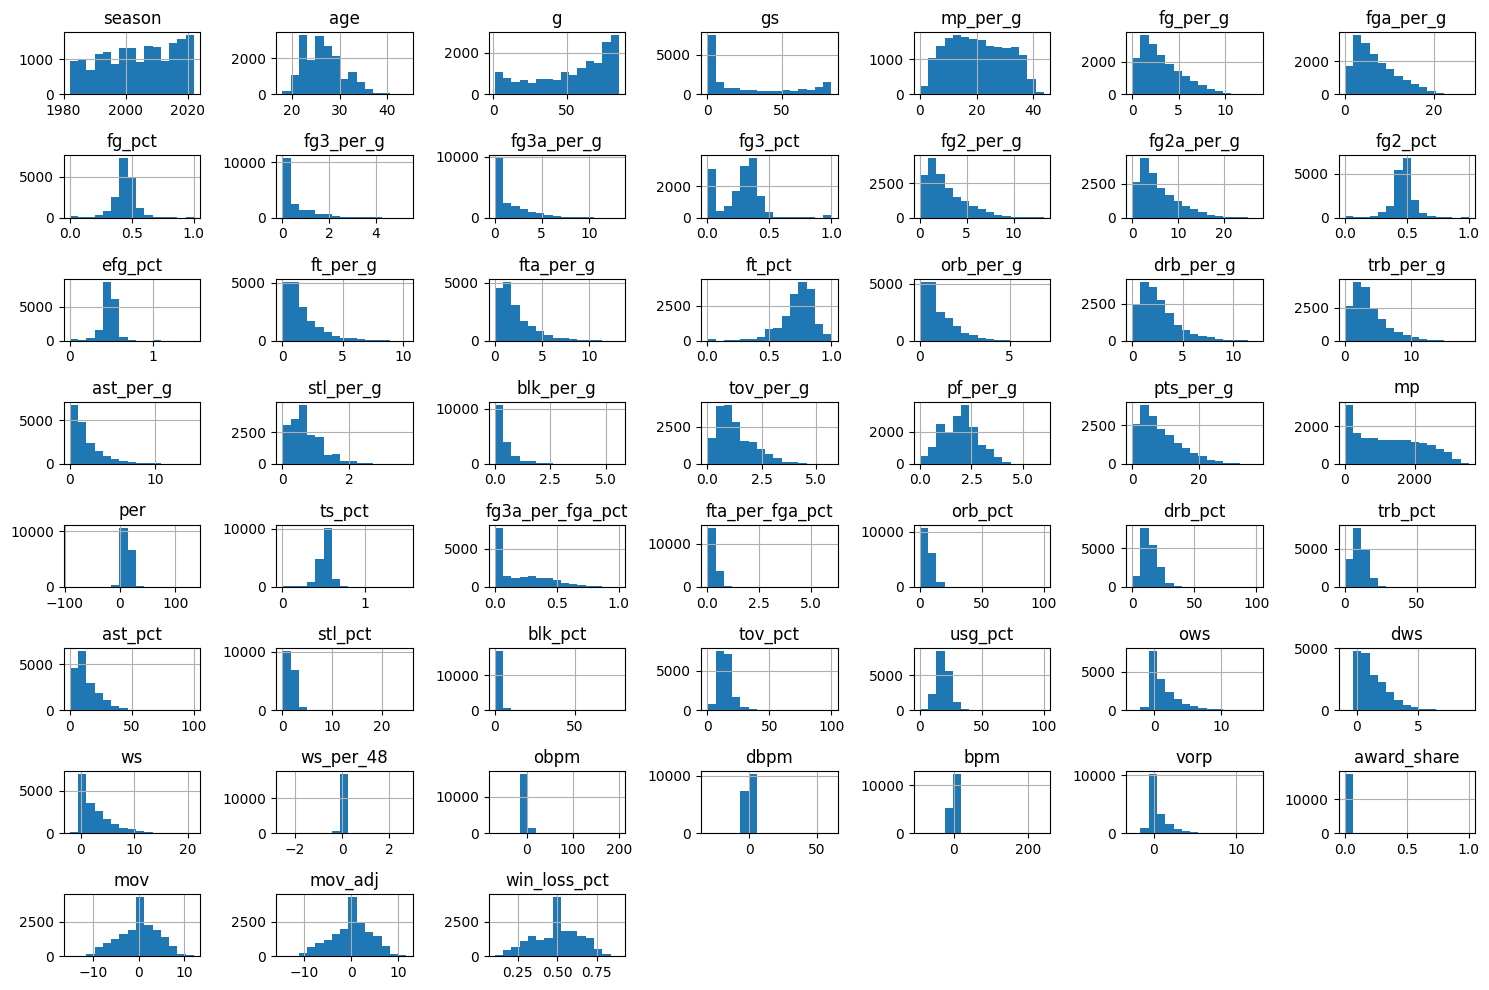

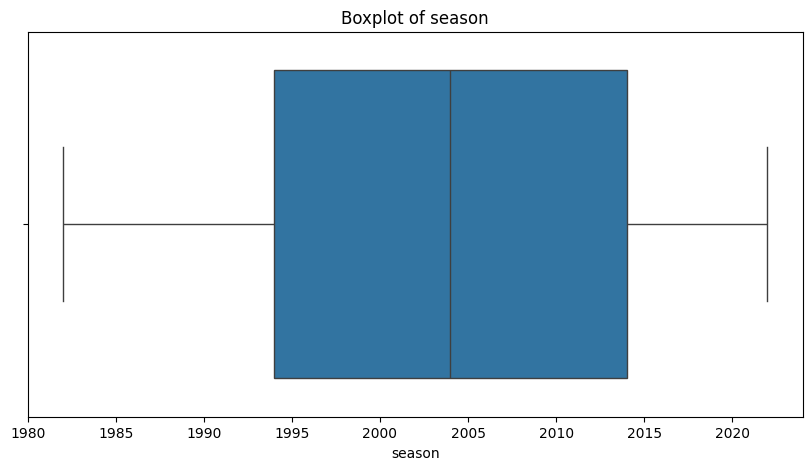

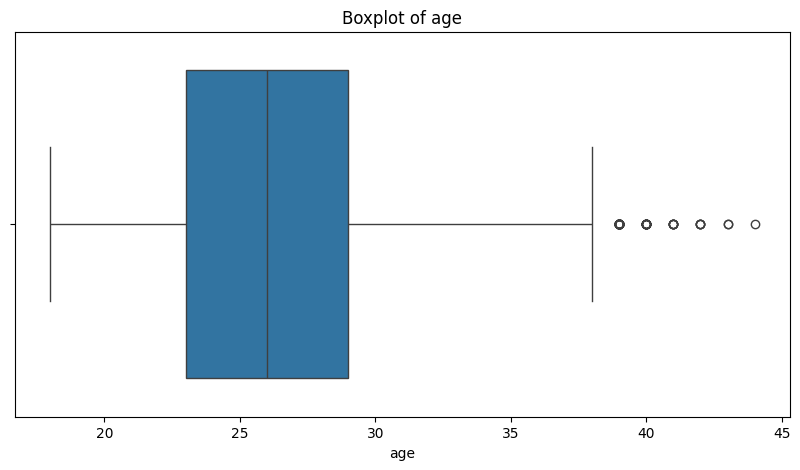

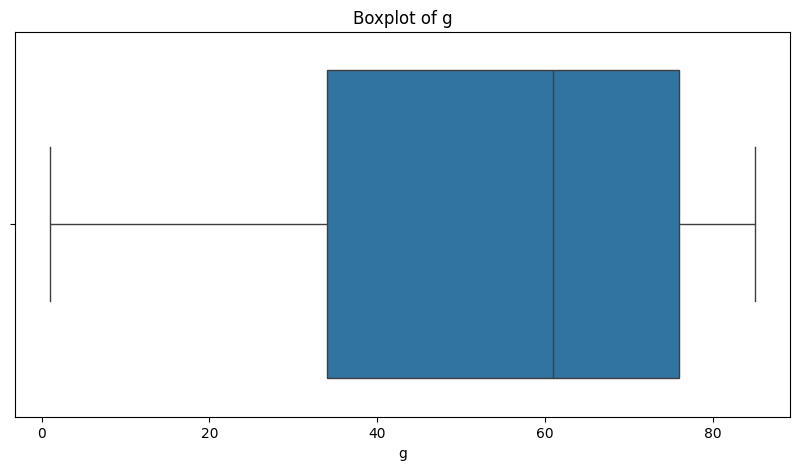

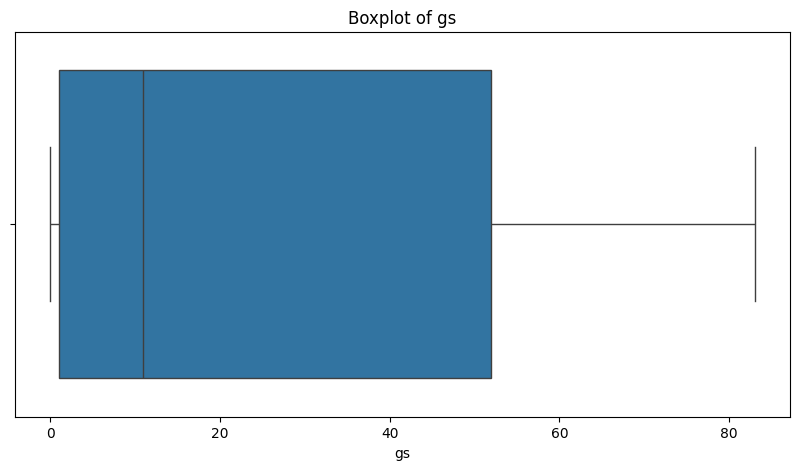

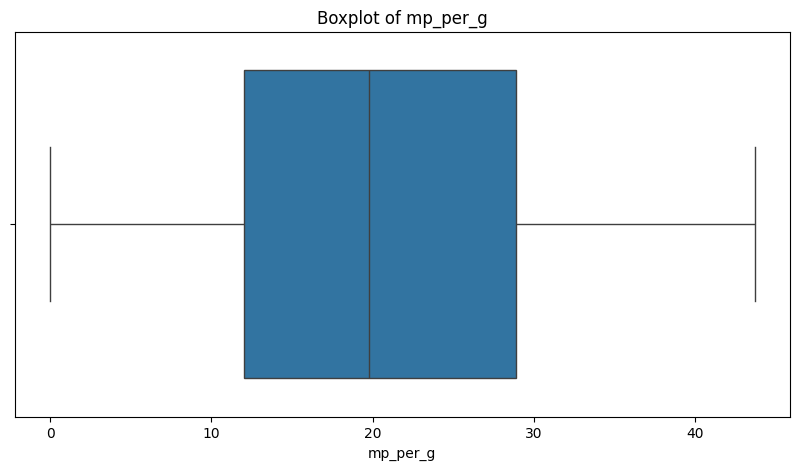

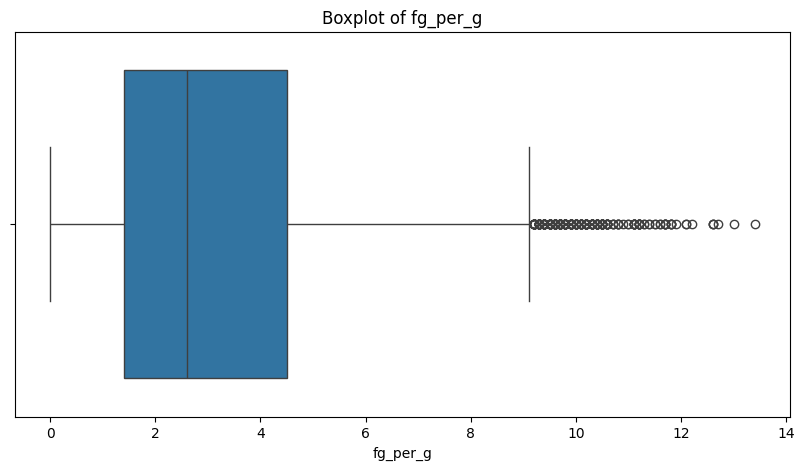

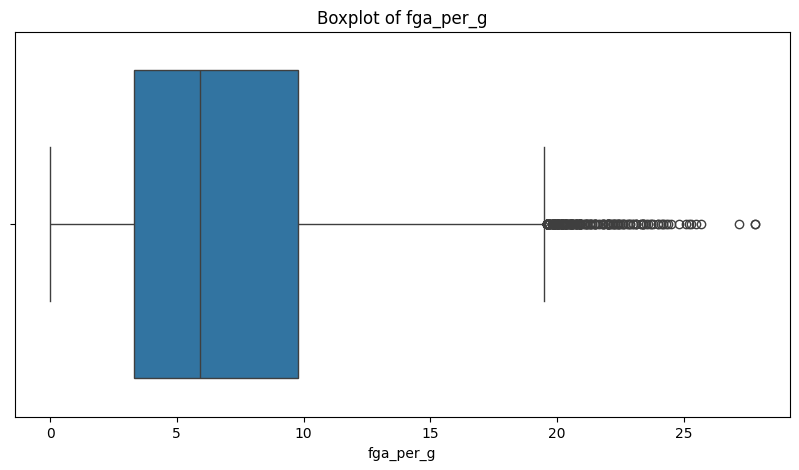

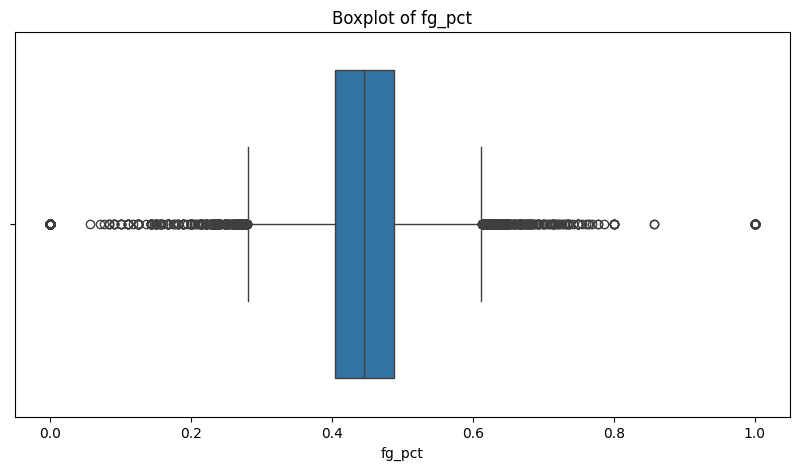

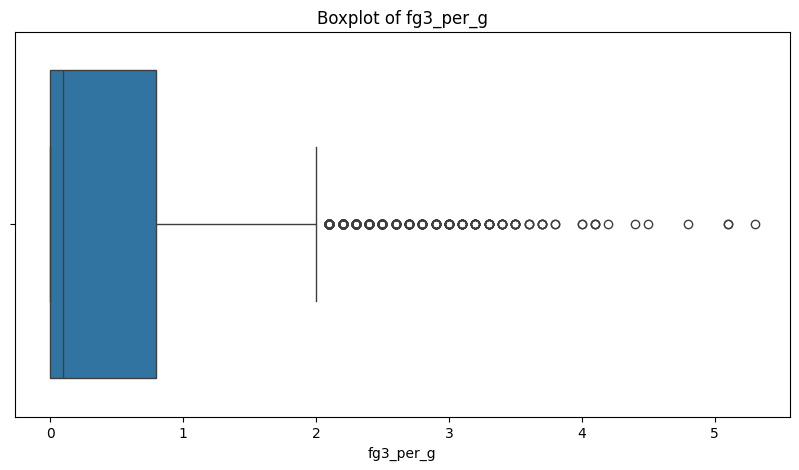

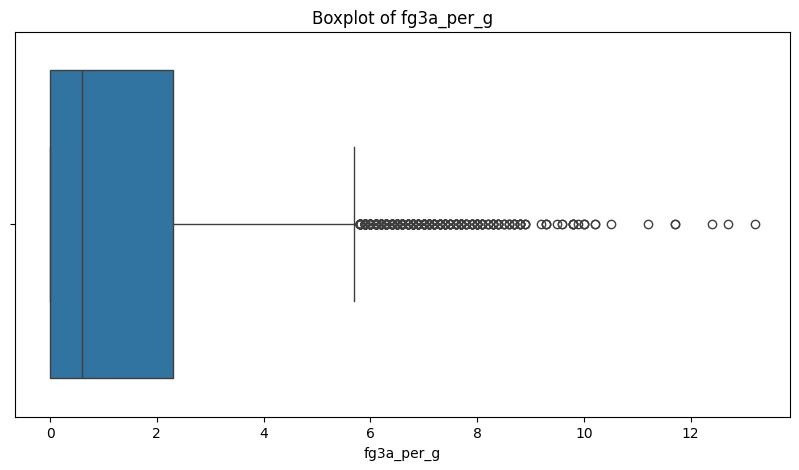

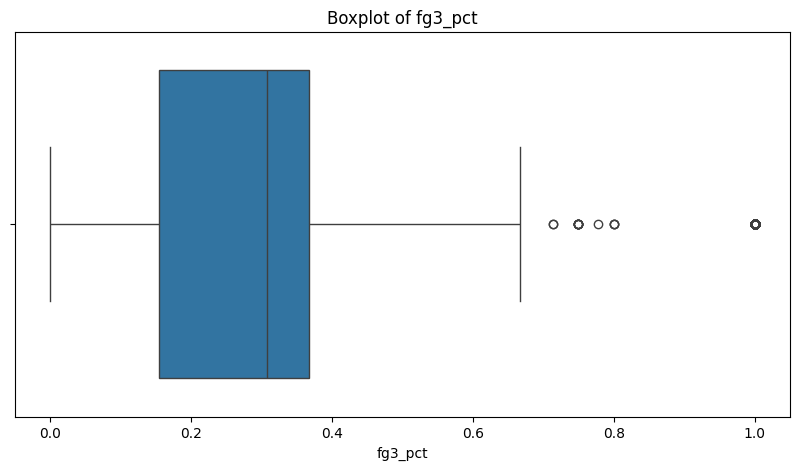

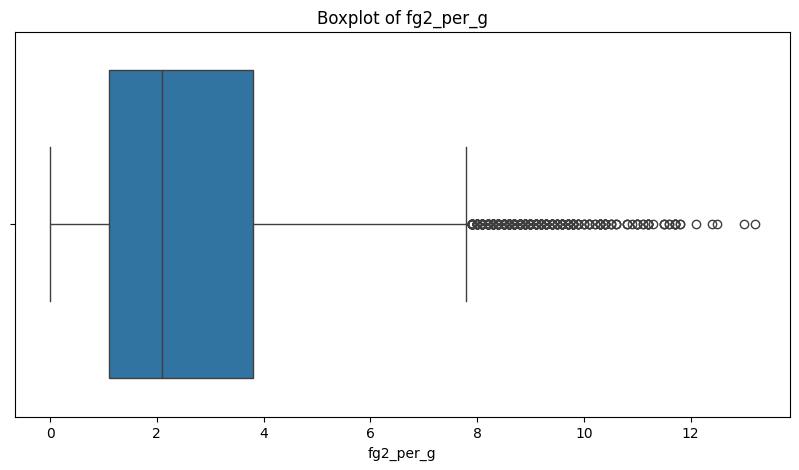

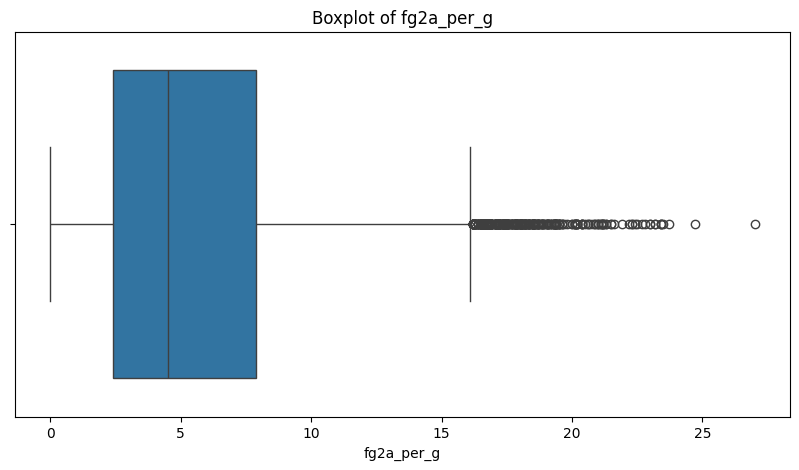

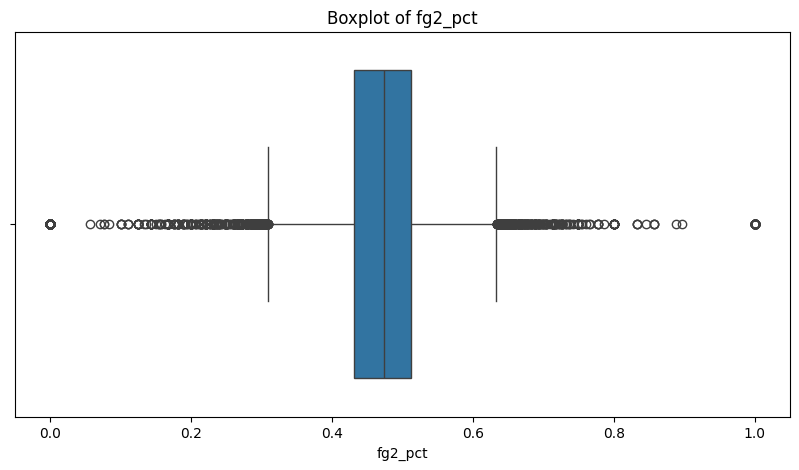

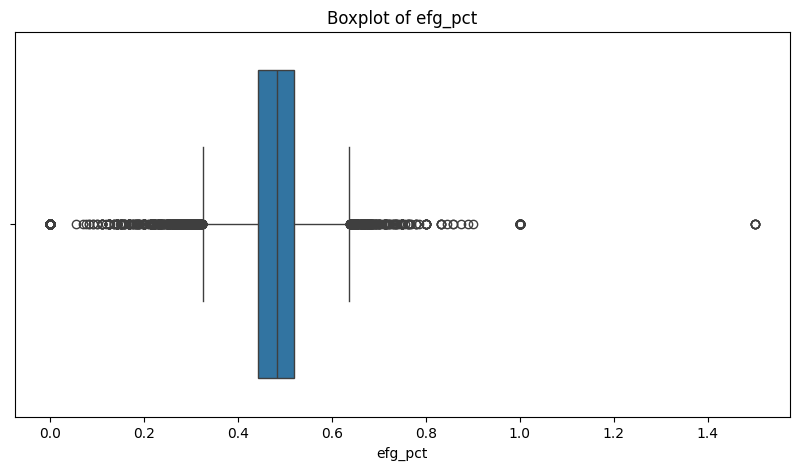

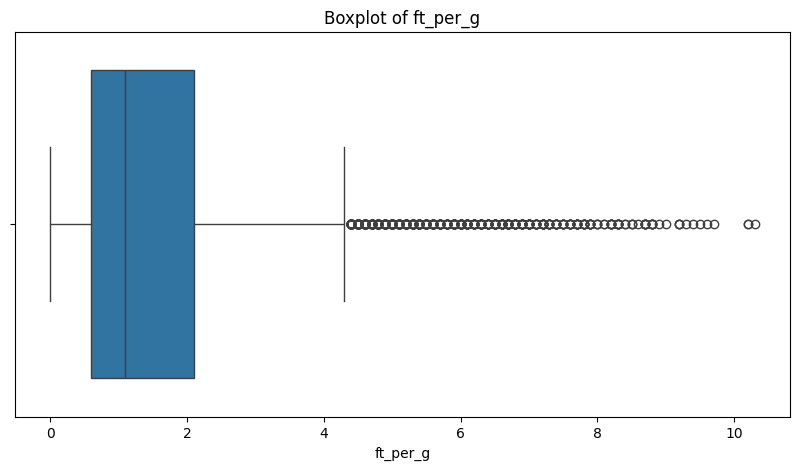

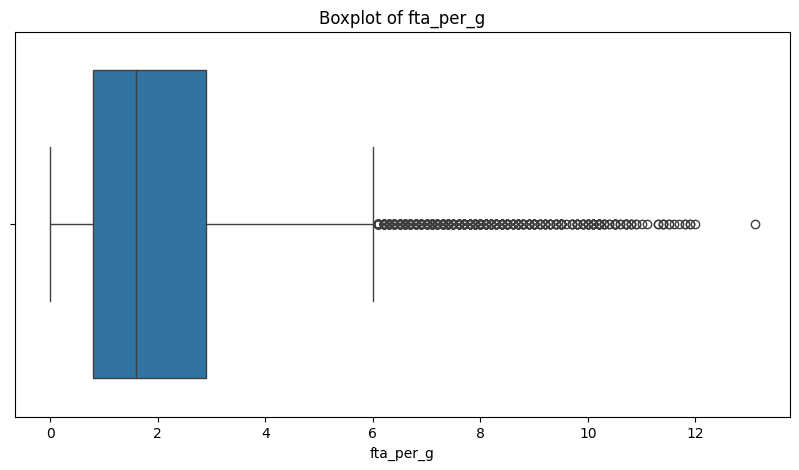

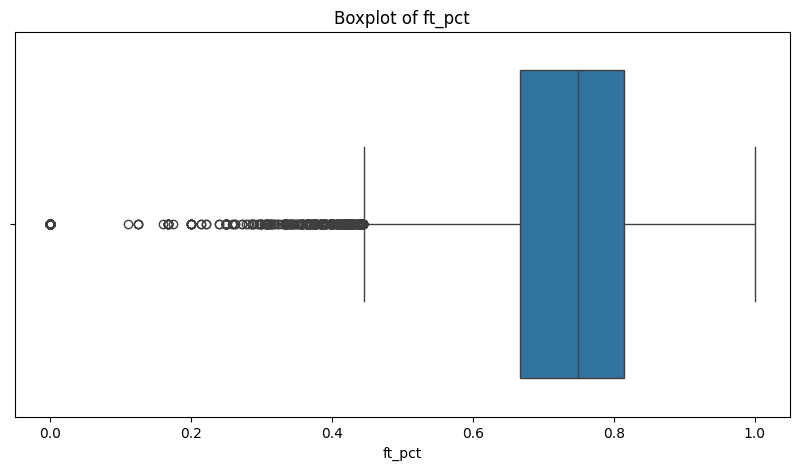

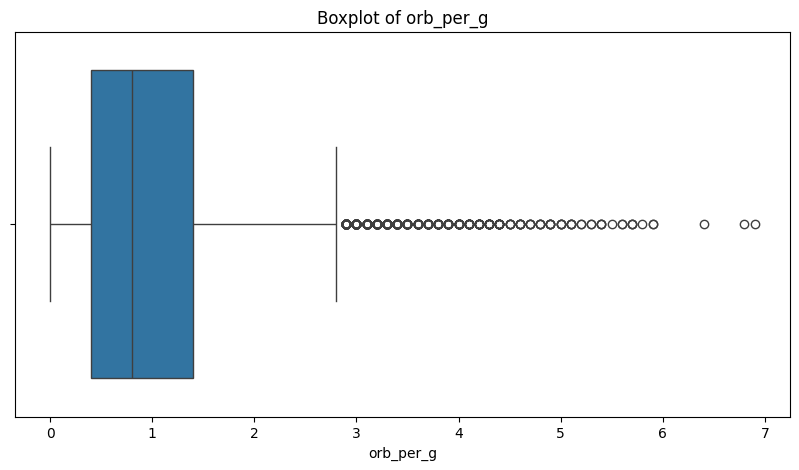

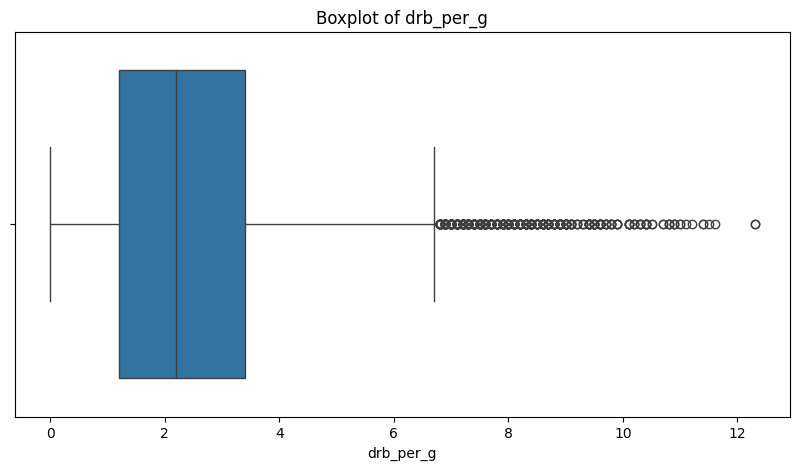

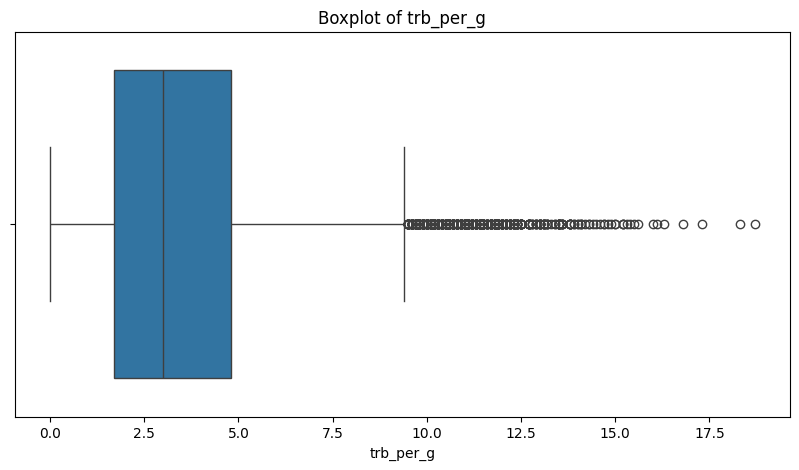

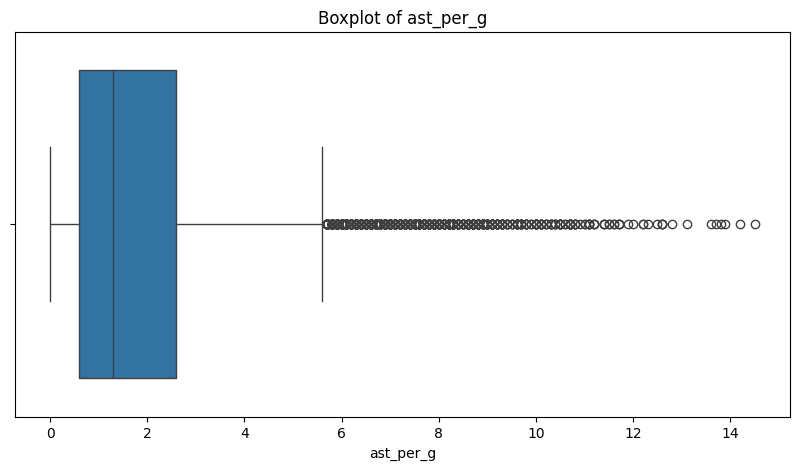

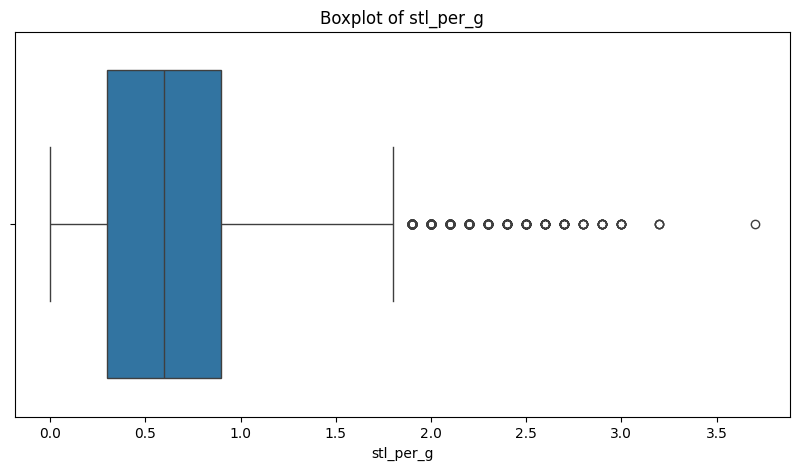

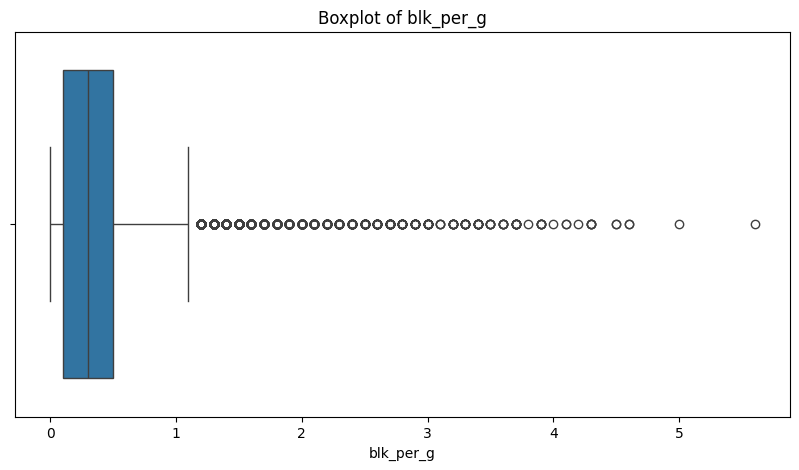

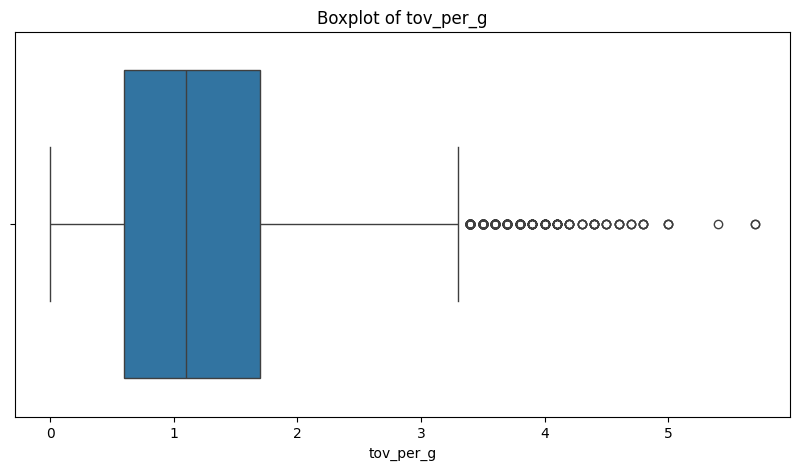

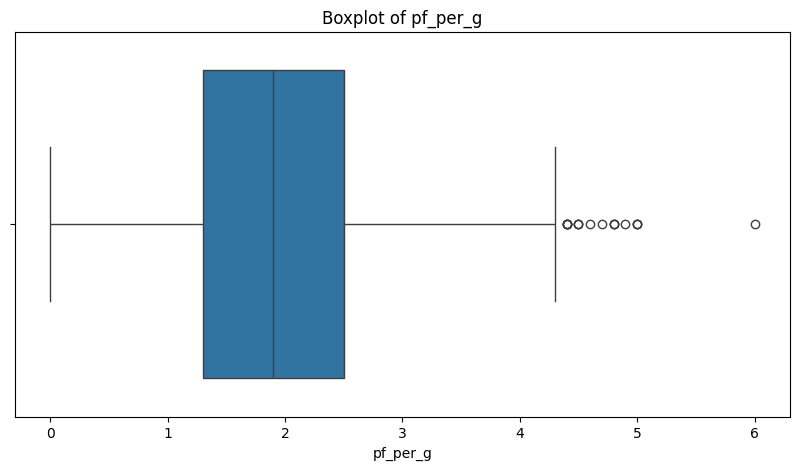

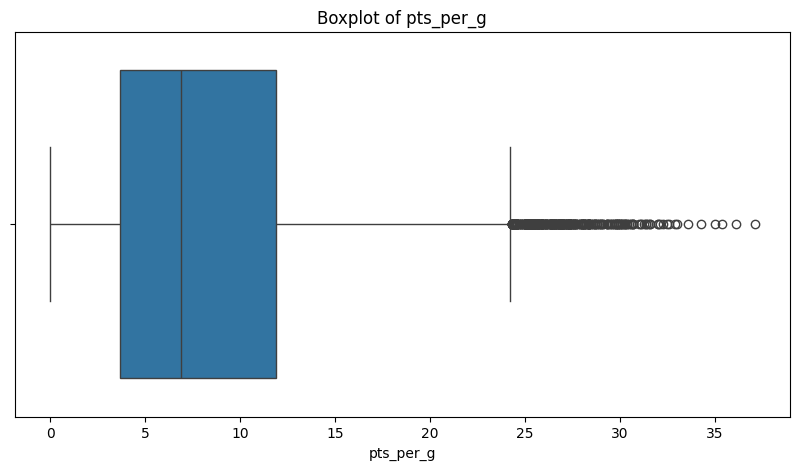

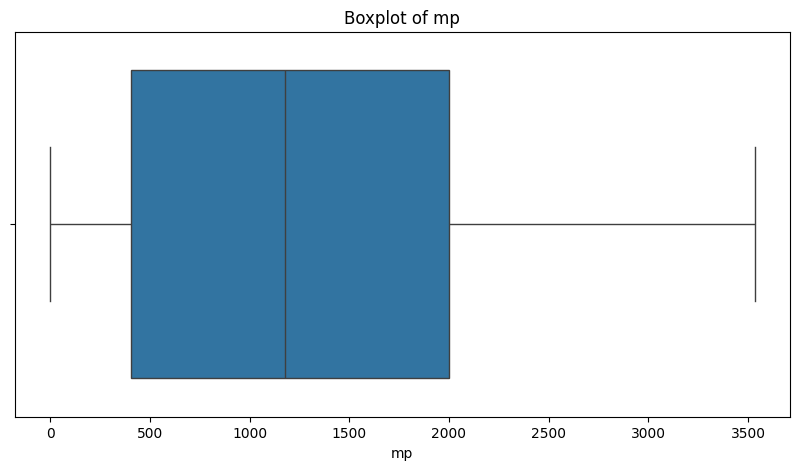

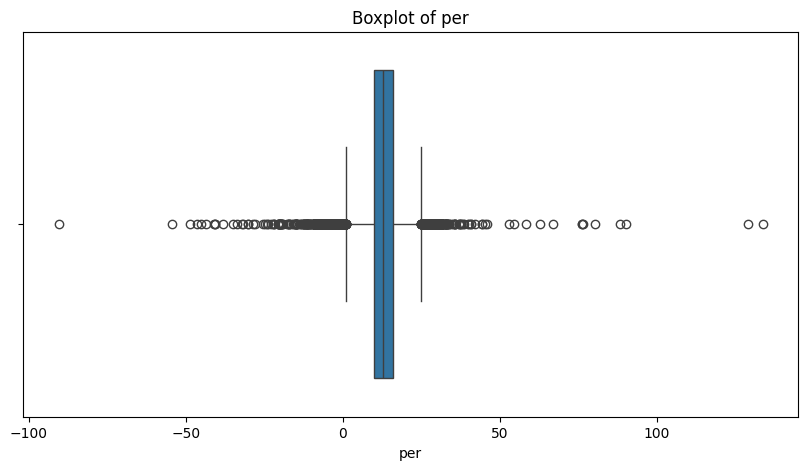

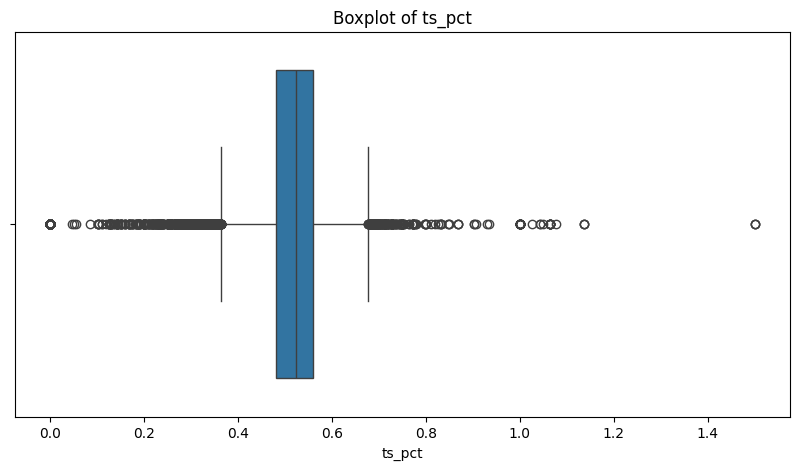

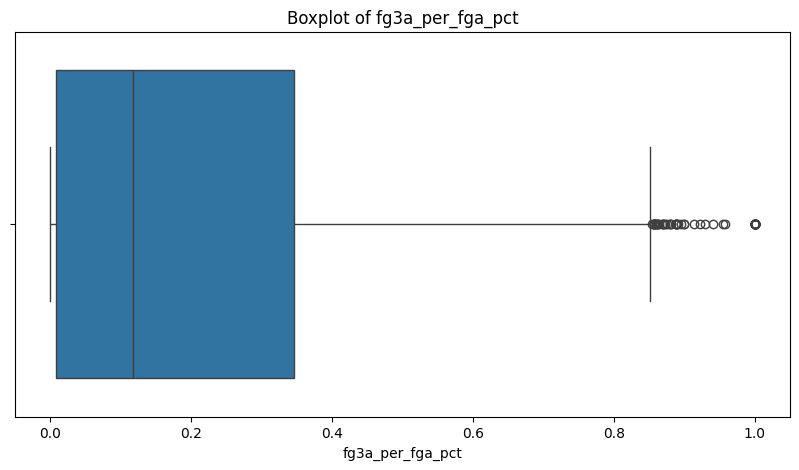

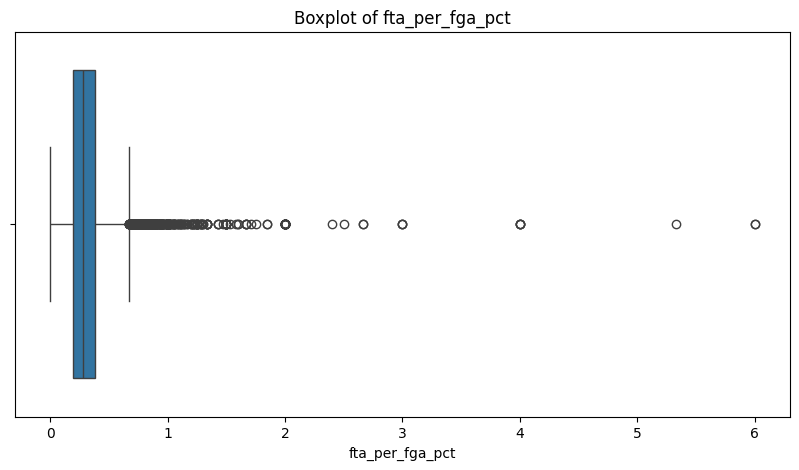

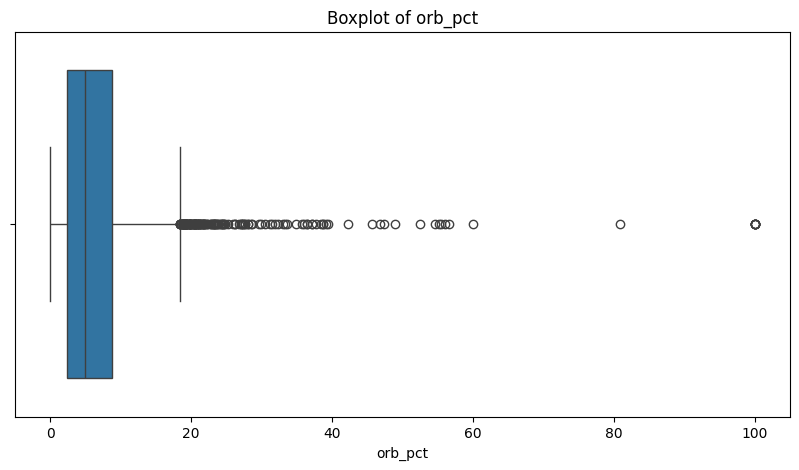

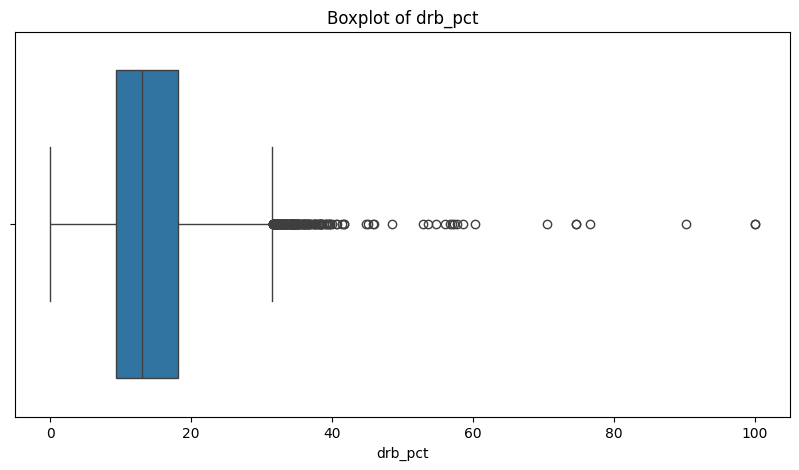

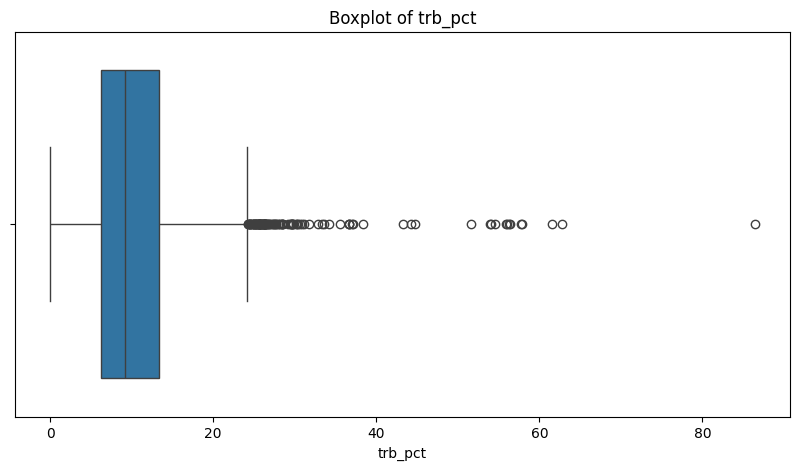

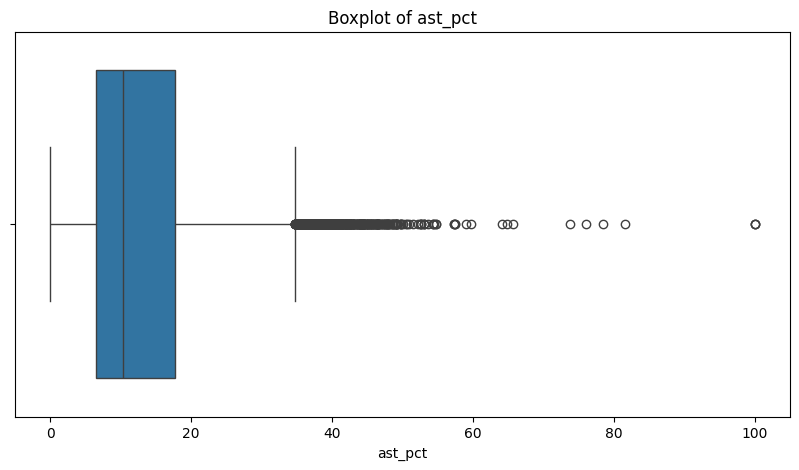

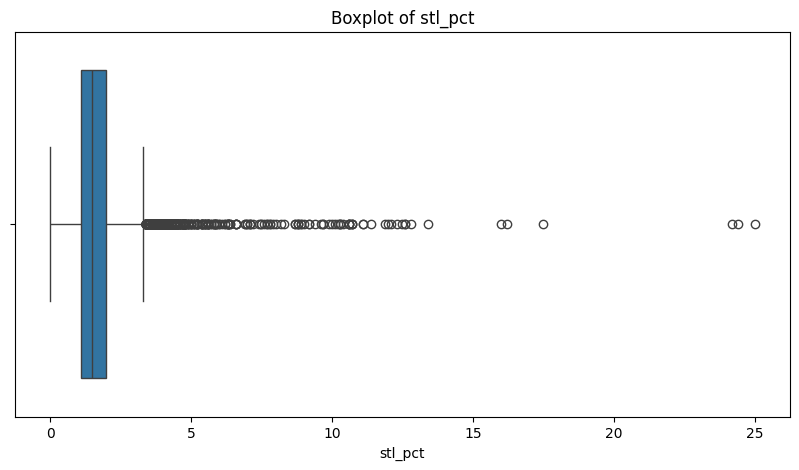

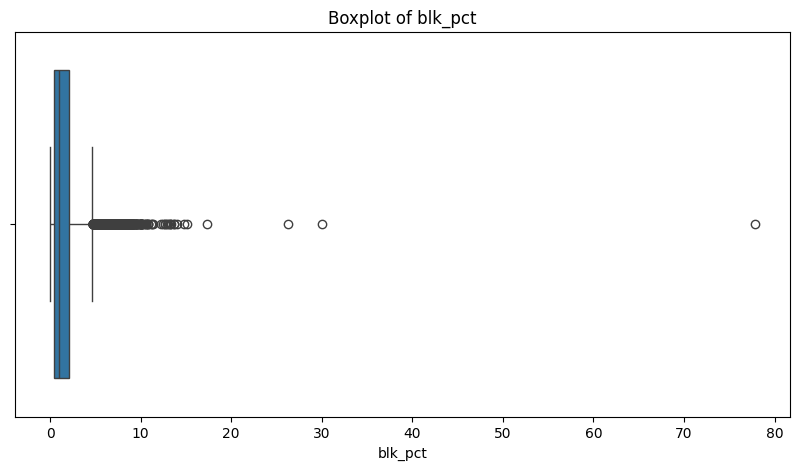

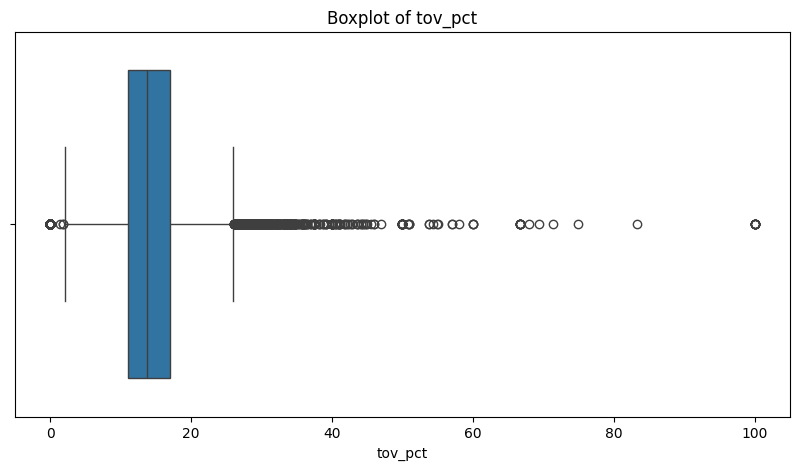

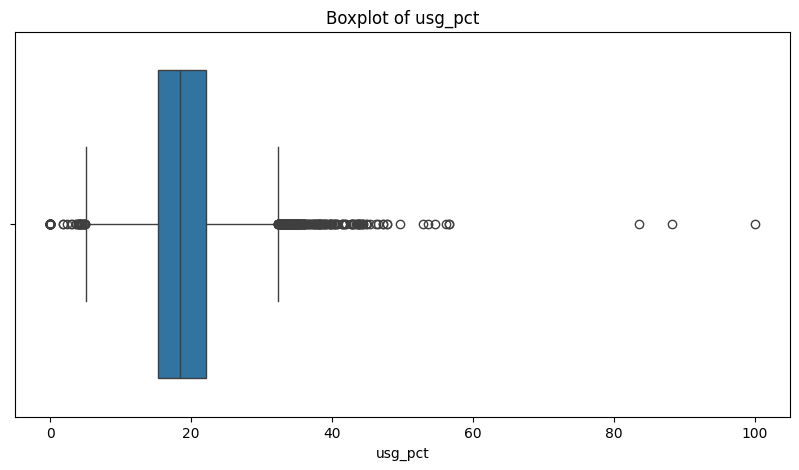

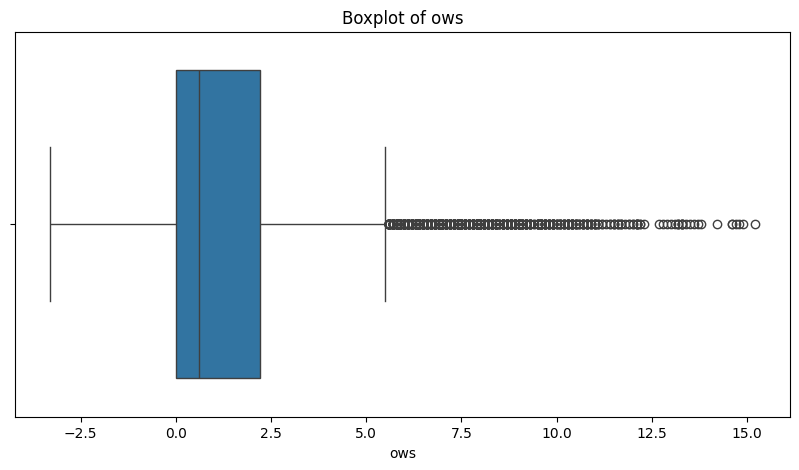

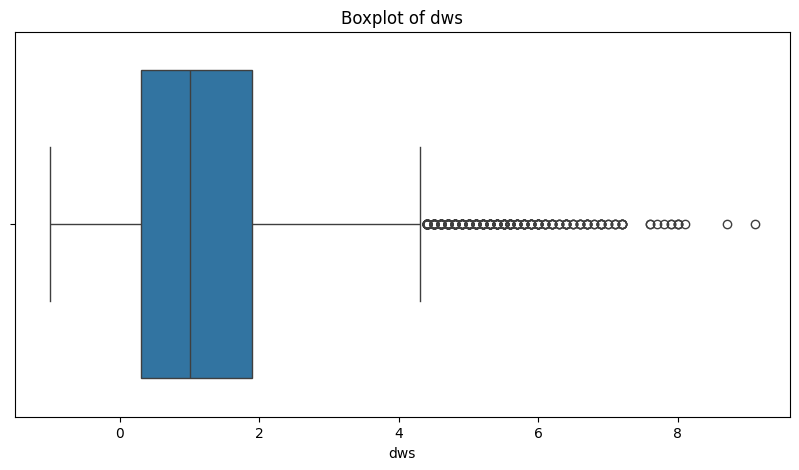

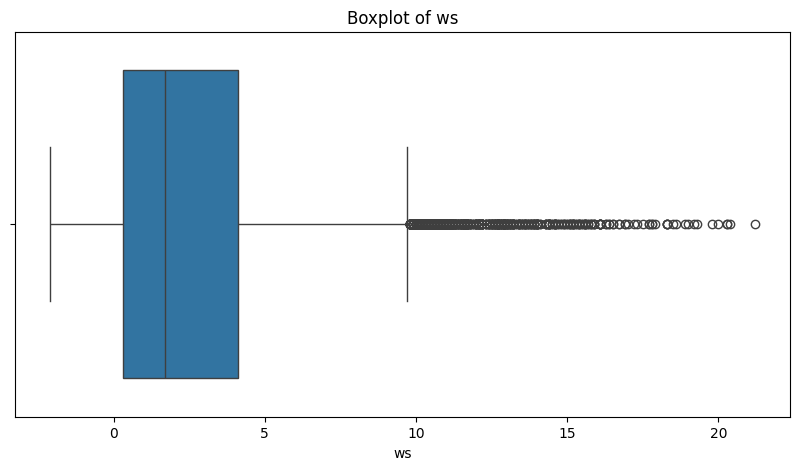

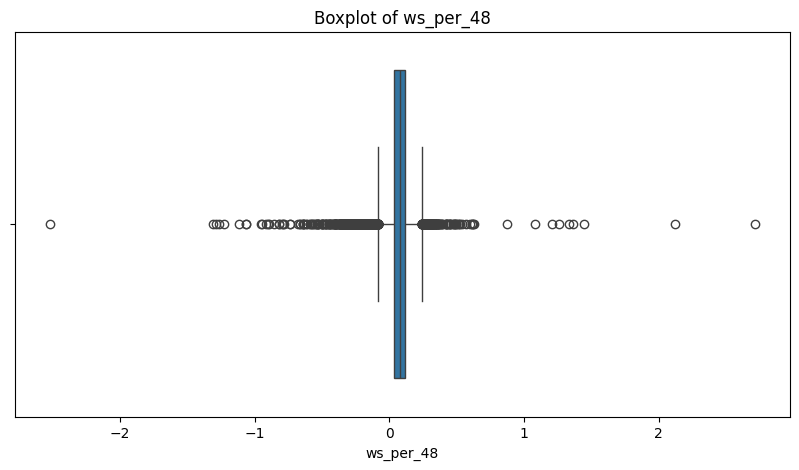

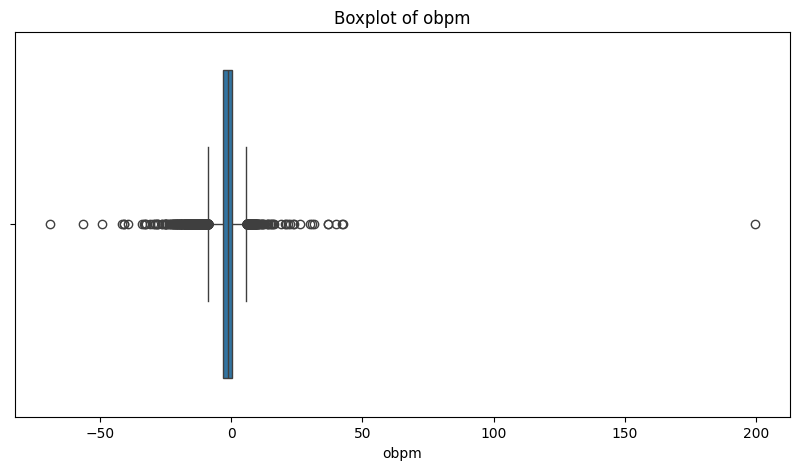

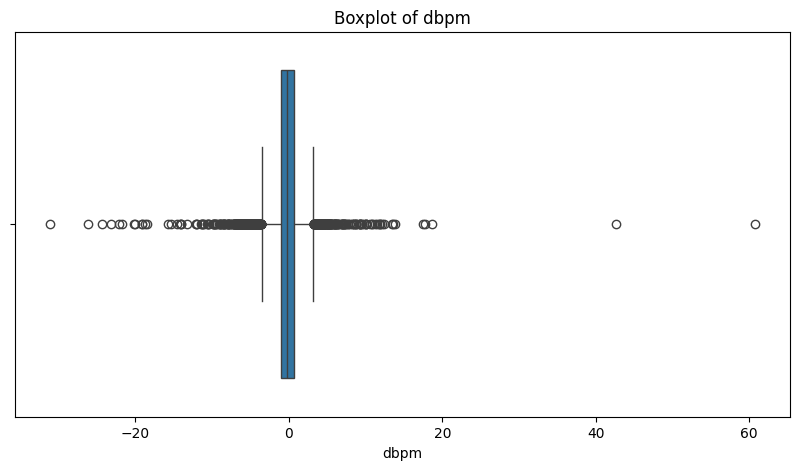

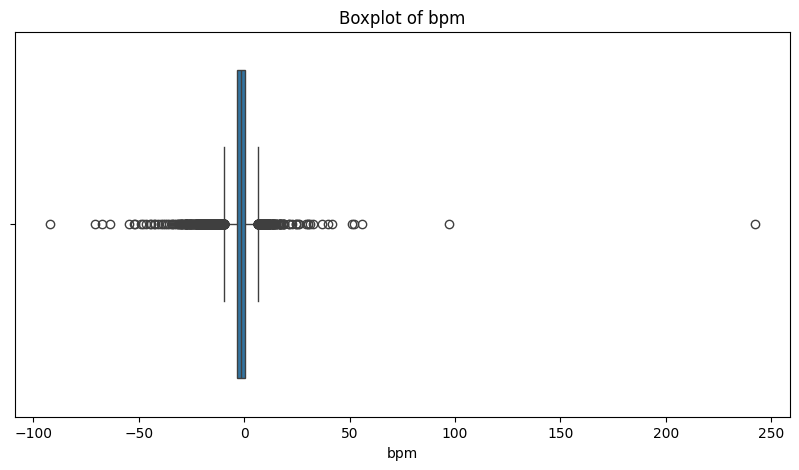

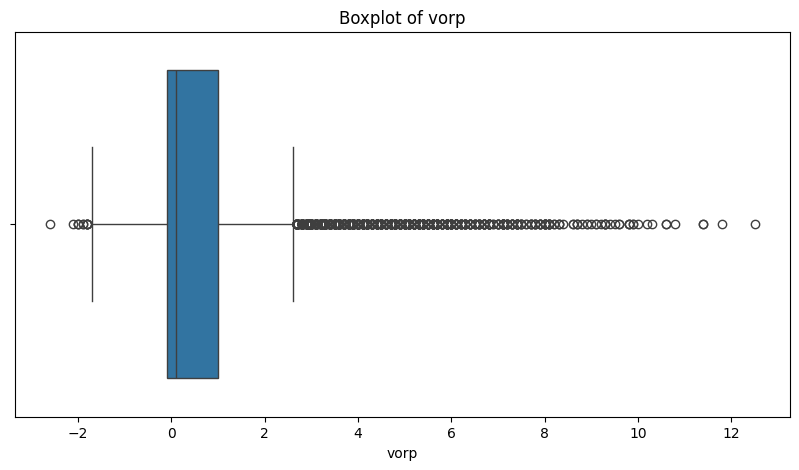

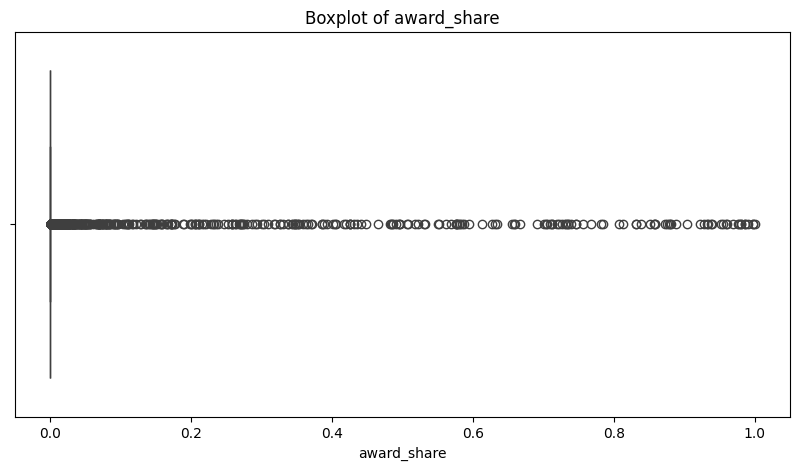

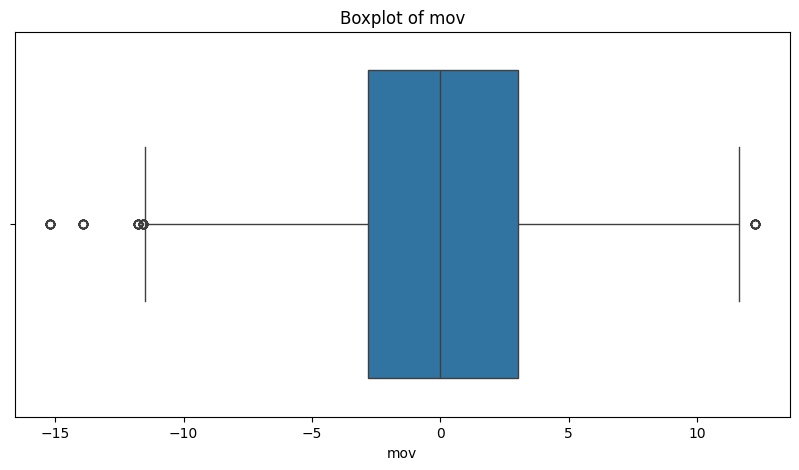

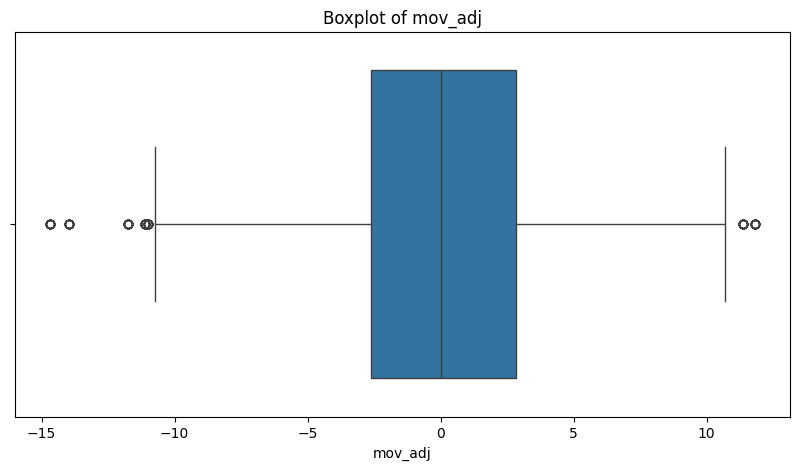

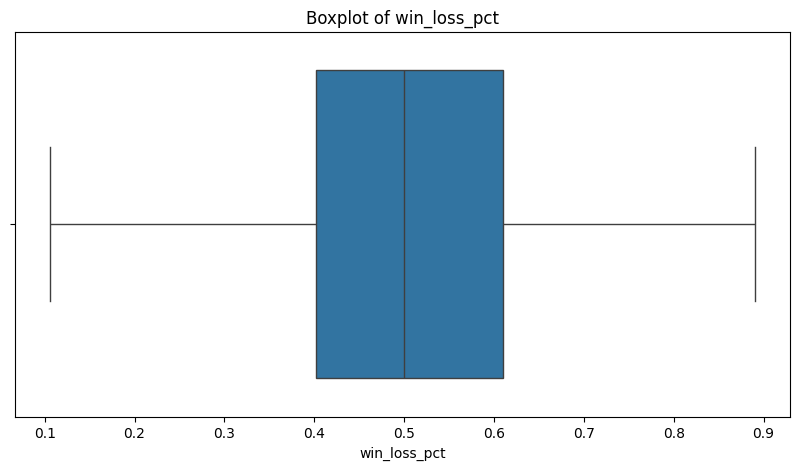

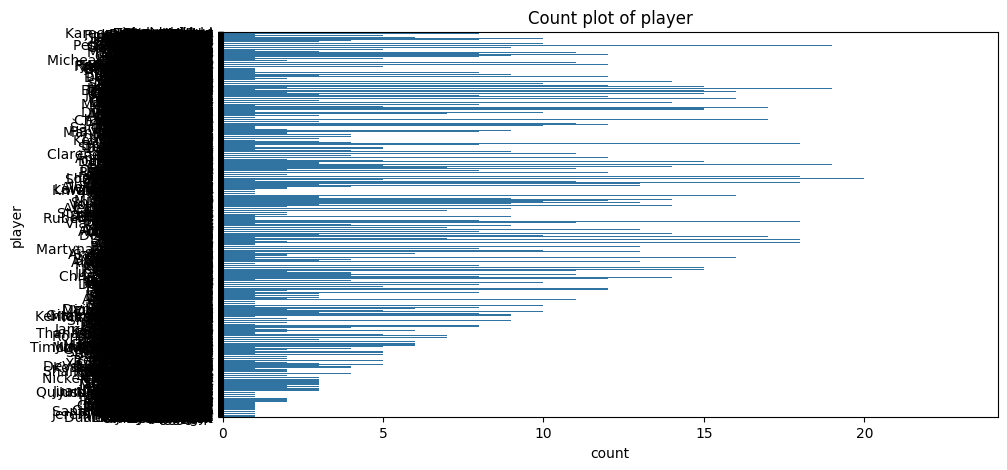

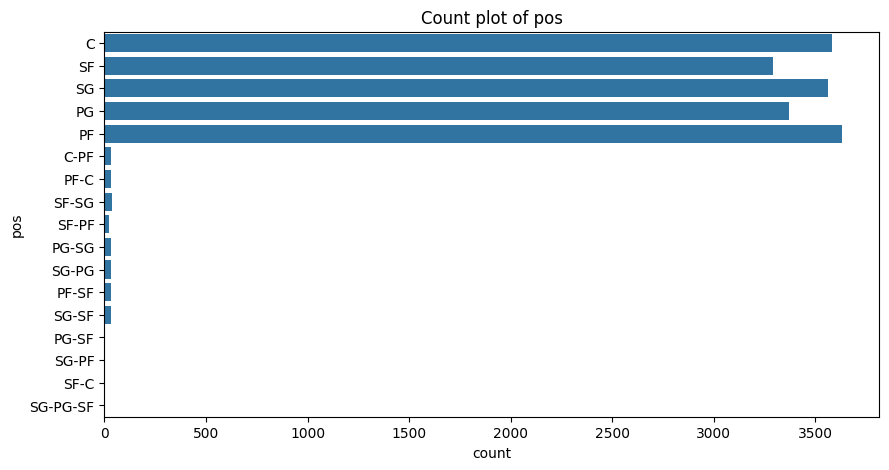

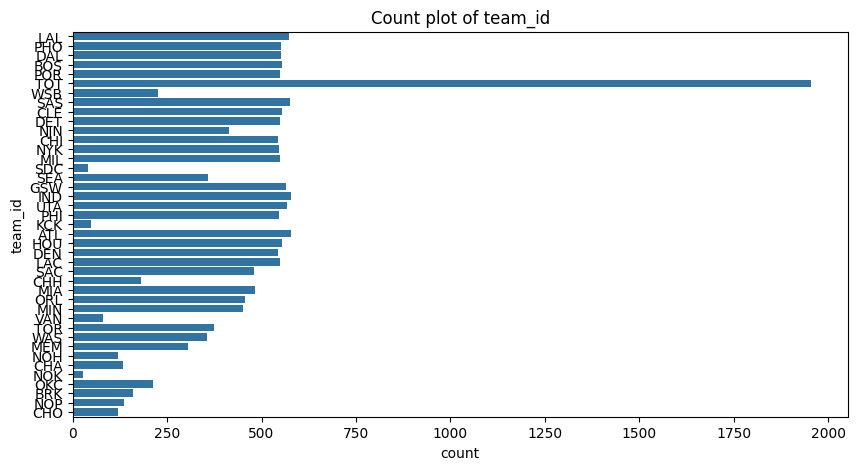

In [91]:
## 2.1 Explore data patterns and distributions

# Histograms for numerical features
NBA.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots for numerical features
for col in NBA.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=NBA[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Count plots for categorical variables
for col in NBA.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=NBA[col])
    plt.title(f'Count plot of {col}')
    plt.show()



In [92]:
#Check for class imbalance in the target variable (as applicable).
NBA['mvp_candidate'] = (NBA['award_share'] > 0).astype(int)

# Check the balance of your new target
print(NBA['mvp_candidate'].value_counts())

mvp_candidate
0    17040
1      657
Name: count, dtype: int64


In [93]:
#2.2 Handle missing values and clean data

# We will replace all missing values in numerical columns with 0.
NBA.fillna(0, inplace=True)
NBA.isnull().sum()  # Verify no missing values remain

season              0
player              0
pos                 0
age                 0
team_id             0
g                   0
gs                  0
mp_per_g            0
fg_per_g            0
fga_per_g           0
fg_pct              0
fg3_per_g           0
fg3a_per_g          0
fg3_pct             0
fg2_per_g           0
fg2a_per_g          0
fg2_pct             0
efg_pct             0
ft_per_g            0
fta_per_g           0
ft_pct              0
orb_per_g           0
drb_per_g           0
trb_per_g           0
ast_per_g           0
stl_per_g           0
blk_per_g           0
tov_per_g           0
pf_per_g            0
pts_per_g           0
mp                  0
per                 0
ts_pct              0
fg3a_per_fga_pct    0
fta_per_fga_pct     0
orb_pct             0
drb_pct             0
trb_pct             0
ast_pct             0
stl_pct             0
blk_pct             0
tov_pct             0
usg_pct             0
ows                 0
dws                 0
ws        

In [94]:
# 2.3 Feature engineering and selection

# Create the target variable 'mvp_candidate'
# 1 if they got votes, 0 if they didn't
NBA['mvp_candidate'] = (NBA['award_share'] > 0).astype(int)
print(NBA['mvp_candidate'].value_counts())


# outliers mvp winners have high statistics so scaling will help for our regression model
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

mvp_candidate
0    17040
1      657
Name: count, dtype: int64


### Reflection 2: 

What patterns or anomalies do you see? 
Do any features stand out? What preprocessing steps were necessary to clean and improve the data? 
Did you create or modify any features to improve performance?

The most prominent "anomalies" in this dataset were the superstar players having significantly better stats than everyone else. I used boxplots and my own domain knowledge to verify that these data points were valid. These outliers were crucial to my prediction, as these "anomalies" are, in fact, the MVP candidates.
Class Imbalance: The most significant finding was the severe class imbalance in my target variable, mvp_candidate, which is composed of players who received at least one MVP vote. After creating this column, I found the dataset was 96.3% "Not Candidate" (players with no MVP votes) and only 3.7% "Candidate" (players who received at least one vote).
Preprocessing:
1.	Scaling: I used StandardScaler to scale all features.
2.	Splitting: I used StratifiedShuffleSplit instead of a standard split to ensure the class ratio remained constant in both the training and test sets.
Feature Creation:
I created the mvp_candidate column because the assignment required a classification model with a binary (0 or 1) format. I converted the award_share column so that any player with an award_share greater than 0 was classified as an mvp_candidate (1).




# Section 3. Feature Selction and Justififcation

In [95]:
# 3.1 Justify feature selection based on domain knowledge and data exploration.
# Using features that directly reflect a player's performance (points, assists, steals, blocks, turnovers, rebounds, shoot attempts, minutes played, and games played) provides a comprehensive view of their contributions on the court.
Feature_list = [
    'pts_per_g',  # points per game
    'ast_per_g',  # assists per game
    'stl_per_g',  # steals per game
    'blk_per_g',  # blocks per game
    'tov_per_g',  # turnovers per game
    'trb_per_g',  # rebounds per game
    'fg_per_g',  # field goals attempted per game
    'mp_per_g',   # minutes played per game
    'g',          # games played
]

# Assign input features to X
X = NBA[feature_list]

#Assign target variable to y
y = NBA['mvp_candidate']

# Print the shapes to confirm
print("Features (X) columns:")
print(X.columns.tolist())
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features (X) columns:
['pts_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'trb_per_g', 'fga_per_g', 'mp_per_g', 'g']

Shape of X: (17697, 9)
Shape of y: (17697,)


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

For my baseline model, I selected 9 features that represent the major statistical categories for evaluating a player's performance: 
Feature_list = [
    'pts_per_g',  # points per game
    'ast_per_g',  # assists per game
    'stl_per_g',  # steals per game
    'blk_per_g',  # blocks per game
    'tov_per_g',  # turnovers per game
    'trb_per_g',  # rebounds per game
    'fg_per_g',   # field goals attempted per game
    'mp_per_g',   # minutes played per game
    'g',          # games played
]
Because the class ratio is so imbalanced, I anticipated that overall "accuracy" would be a misleading metric. Instead, the model's impact would have to be judged on its Recall and Precision for the '1' class. This 9-feature model serves as a solid baseline to see what "traditional" stats can predict.

 


# Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)


In [96]:
# 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X_scaled, y):
    X_train, X_test = X_scaled[train_indices], X_scaled[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))
print('Test set balance:\n', y_test.value_counts(normalize=True)) 

Train size:  14157 Test size:  3540
Test set balance:
 mvp_candidate
0    0.962994
1    0.037006
Name: proportion, dtype: float64



Classification Report:
                   precision    recall  f1-score   support

Not Candidate (0)       0.98      0.99      0.99      3409
    Candidate (1)       0.63      0.59      0.61       131

         accuracy                           0.97      3540
        macro avg       0.81      0.79      0.80      3540
     weighted avg       0.97      0.97      0.97      3540



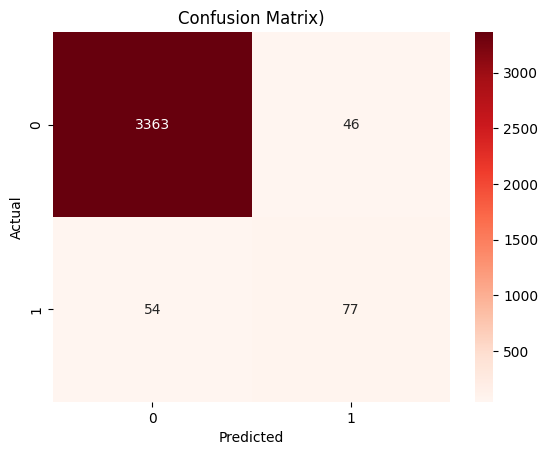

In [97]:
# 4.2 Train model using Scikit-Learn model.fit() method.
tree_model1= DecisionTreeClassifier()
tree_model1.fit(X_train, y_train)

# 4.3 Evalulate performance, for example:
y_pred = tree_model1.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Candidate (0)', 'Candidate (1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Reflection 4: How well did the model perform? Any surprises in the results?
Classification Report:
                   precision    recall  f1-score   support

Not Candidate (0)       0.98      0.99      0.98      3409
    Candidate (1)       0.60      0.58      0.59       131

         accuracy                           0.97      3540
        macro avg       0.79      0.78      0.79      3540
     weighted avg       0.97      0.97      0.97      3540

Recall: 0.59 (or 59%): This is the most important metric. It means the model successfully identified 59% of the actual MVP candidates in the test set. It missed the other 41%.
Precision: 0.59 (or 59%): When the model did predict a player was a candidate, it was correct 59% of the time.
F1-Score: 0.59: This is the balanced average of Precision and Recall, providing a single score for the model's effectiveness at handling the '1' class.


# Section 5. Improve the Model or Try Alternates (Implement a Second Option)


Original shape: (17697, 56)
Original balance:
 mvp_candidate
0    0.962875
1    0.037125
Name: proportion, dtype: float64
After filtering:
 mvp_candidate
0    0.946577
1    0.053423
Name: proportion, dtype: float64
Data filtered. Players with <= 42 games played removed.
Filtered split complete. Train size: 9733, Test size: 2434

Classification Report (Filtered Data):
                   precision    recall  f1-score   support

Not Candidate (0)       0.98      0.97      0.97      2304
    Candidate (1)       0.55      0.58      0.56       130

         accuracy                           0.95      2434
        macro avg       0.76      0.78      0.77      2434
     weighted avg       0.95      0.95      0.95      2434


Confusion Matrix for Filtered Model


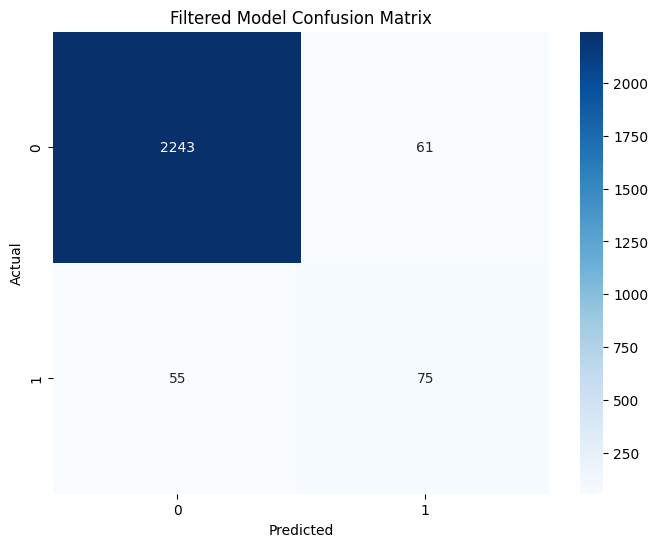

In [ ]:
# Since dataset is large I tried filtering out players who played less than half the season (42 games) since it will be virtually impossible to be mvp with only half a season played.
NBA = pd.read_csv('NBA_Dataset.csv')
NBA['mvp_candidate'] = (NBA['award_share'] > 0).astype(int)


# Applyign filter to improve model
print(f"Original shape: {NBA.shape}")
print("Original balance:\n", NBA['mvp_candidate'].value_counts(normalize=True))

NBA_filtered = NBA[NBA['g'] > 42]
print("After filtering:\n", NBA_filtered['mvp_candidate'].value_counts(normalize=True))
print("Data filtered. Players with <= 42 games played removed.")

# Define X and y from filtered data
feature_list = [
    'pts_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g',
    'tov_per_g', 'trb_per_g', 'fga_per_g', 'mp_per_g', 'g'
]
X_filtered = NBA_filtered[feature_list]
y_filtered = NBA_filtered['mvp_candidate']

# Scale the filtered data
scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Split the filtered data
splitter_filtered = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter_filtered.split(X_filtered_scaled, y_filtered):
    X_train_fil = X_filtered_scaled[train_indices]
    X_test_fil = X_filtered_scaled[test_indices]
    y_train_fil = y_filtered.iloc[train_indices]
    y_test_fil = y_filtered.iloc[test_indices]

print(f"Filtered split complete. Train size: {len(X_train_fil)}, Test size: {len(X_test_fil)}")

# Train Filtered Model
tree_model_filtered = DecisionTreeClassifier(random_state=123)
tree_model_filtered.fit(X_train_fil, y_train_fil)

# Evaluate Filtered Model
y_pred_fil = tree_model_filtered.predict(X_test_fil)

# Classification Report
print("\nClassification Report (Filtered Data):")
print(classification_report(y_test_fil, y_pred_fil, target_names=['Not Candidate (0)', 'Candidate (1)']))

# Confusion Matrix
print("\nConfusion Matrix for Filtered Model")
cm_fil = confusion_matrix(y_test_fil, y_pred_fil)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fil, annot=True, fmt='d', cmap='Blues')
plt.title('Filtered Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Train Random Forest on Filtered Data
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_fil, y_train_fil)

#Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_fil)

print("\nClassification Report (Random Forest on Filtered Data):")
print(classification_report(y_test_fil, y_pred_rf, target_names=['Not Candidate (0)', 'Candidate (1)']))


Classification Report (Random Forest on Filtered Data):
                   precision    recall  f1-score   support

Not Candidate (0)       0.97      0.99      0.98      2304
    Candidate (1)       0.74      0.51      0.60       130

         accuracy                           0.96      2434
        macro avg       0.86      0.75      0.79      2434
     weighted avg       0.96      0.96      0.96      2434



In [100]:
# Logistic Regression on Filtered Data

#Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=123)
lr_model.fit(X_train_fil, y_train_fil)

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test_fil)

print("\nClassification Report (Logistic Regression on Filtered Data):")
print(classification_report(y_test_fil, y_pred_lr, target_names=['Not Candidate (0)', 'Candidate (1)']))


Classification Report (Logistic Regression on Filtered Data):
                   precision    recall  f1-score   support

Not Candidate (0)       0.97      0.99      0.98      2304
    Candidate (1)       0.78      0.54      0.64       130

         accuracy                           0.97      2434
        macro avg       0.88      0.76      0.81      2434
     weighted avg       0.96      0.97      0.96      2434



Features (X) defined using all 50 numeric columns.
All numeric data split. Train size: 14157, Test size: 3540

Training Model (All Numeric Decision Tree)
All numeric model training complete.

Evaluation for All Numeric Model

Classification Report (All Numeric):
                   precision    recall  f1-score   support

Not Candidate (0)       0.99      0.99      0.99      3409
    Candidate (1)       0.63      0.65      0.64       131

         accuracy                           0.97      3540
        macro avg       0.81      0.82      0.81      3540
     weighted avg       0.97      0.97      0.97      3540


Generating Confusion Matrix for All Numeric Model...


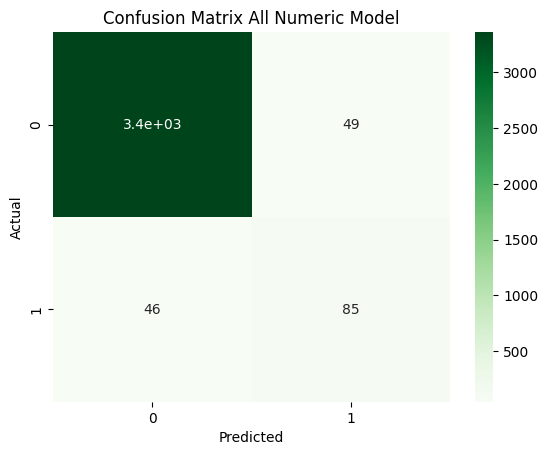

In [101]:
#all numeric columns model
#load dataset
NBA = pd.read_csv('NBA_Dataset.csv')

#  Create Target Variable 
NBA['mvp_candidate'] = (NBA['award_share'] > 0).astype(int)
y = NBA['mvp_candidate']

# Define X using all numeric columns 
# This selects all columns that are 'int' or 'float'
X_all_numeric = NBA.select_dtypes(include=np.number)
X_all_numeric = NBA.select_dtypes(include=np.number)

# Remove Target-Related & Identifier Columns
columns_to_drop = ['award_share', 'mvp_candidate']
if 'season' in X_all_numeric.columns:
    columns_to_drop.append('season')

X_all_numeric = X_all_numeric.drop(columns=columns_to_drop)
print(f"Features (X) defined using all {X_all_numeric.shape[1]} numeric columns.")

# Scale the Data 
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all_numeric)

# Split the Data 
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X_all_scaled, y):
    X_train_all = X_all_scaled[train_indices]
    X_test_all = X_all_scaled[test_indices]
    y_train_all = y.iloc[train_indices]
    y_test_all = y.iloc[test_indices]

print(f"All numeric data split. Train size: {len(X_train_all)}, Test size: {len(X_test_all)}")

# Train "All Numeric" Model
print("\nTraining Model (All Numeric Decision Tree)")

tree_model_all = DecisionTreeClassifier(random_state=123)
tree_model_all.fit(X_train_all, y_train_all)
print("All numeric model training complete.")

# Evaluate "All Numeric" Model 
print("\nEvaluation for All Numeric Model")
y_pred_all = tree_model_all.predict(X_test_all)

# Classification Report
print("\nClassification Report (All Numeric):")
print(classification_report(y_test_all, y_pred_all, target_names=['Not Candidate (0)', 'Candidate (1)']))

# Generate Confusion Matrix 
print("\nGenerating Confusion Matrix for All Numeric Model...")
cm_all = confusion_matrix(y_test_all, y_pred_all)

sns.heatmap(cm_all, annot=True, cmap='Greens')
plt.title('Confusion Matrix All Numeric Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

The "All Numeric" Decision Tree model performed the best. It achieved the highest Recall (0.65) and a joint-highest F1-score (0.64) (tied with the Filtered Logistic Regression model). In a project like this, having the highest Recall is the most important, as you want to find as many of the true candidates as possible.
This model was more effective because it was trained on all 50 available numeric features instead of a smaller, filtered set. MVP voting is an incredibly complex decision that isn't just about surface-level stats. By having access to all 50 columns, this model could learn from advanced metrics (like per for Player Efficiency Rating, ts_pct for True Shooting Percentage, etc.) that incorporate a player's efficiency, as well as team stats like win_loss_pct.



# Section 6. Final Thoughts & Insights

6.1 Summarize findings.

The award_share column, was converted into a binary target variable named mvp_candidate (where 1 = received votes, 0 = no votes). This successfully converted the project into a classification problem.

A baseline Decision Tree model was trained using 9 traditional "per-game" statistics. This model established a reasonable, but modest, benchmark, achieving a Recall of 0.58 and an F1-Score of 0.59 for the 'Candidate (1)' class.

Several alternate approaches were tested to improve upon the baseline:

I filtered dataset for players with more than 42 games were both tested. This performed worse than the unfiltered dataset. Random Forest and Logistic Regression models showed interesting trade-offs between precision and recall, but neither decisively beat the baseline model's balanced F1-score.

The most successful model was an "All Numeric" Decision Tree trained on all 50 available numeric features.

The "All Numeric" model was the clear winner. It achieved a Recall of 0.65, a Precision of 0.63, and F1-Score of 0.64. This finding proves that providing the model with more data (including advanced metrics like per, ws, and team win_loss_pct etc.) is superior to using a smaller, curated set of features.

6.2 Discuss challenges faced.

The Problem: The dataset was composed of 96.3% "Not Candidate" (0) instances and only 3.7% "Candidate" (1) data instances.

This imbalance made "Accuracy" useless and misleading. A lazy model could achieve 96.3% accuracy by simply predicting "0" every time which is not helpful in this project.

I couldn't just clean the data; I had to test if filtering by games played actually helped or hurt the model's ability to find the rare '1' class.

6.3 If you had more time, what would you try next?
With more time i would have precisly try to preidct who will the MVP finalist. This will take a rankinng system to fidn the top 3 players highest award_share. 


### Reflection 6: What did you learn from this project?

I learned that my assumptions about the data were often incorrect and had to be tested.I assumed that filtering out players with less than 42 games played would reduce noise  and help the model. The results showed the exact opposite: this filter hurt performance, and my baseline model was better.I assumed that a curated list of "major" stats (like pts_per_g, ast_per_g, etc.) would be smart and efficient. The results proved this wrong. The "All Numeric" model, which used all 50 features, was superior in every way (higher recall, higher precision, and a better F1-score).The "All Numeric" model's success was the project's biggest finding. It proved that MVP voting is complex and that advanced metrics and team success are highly predictive. The best approach was to give the model all the available information and let it find the complex patterns, rather than trying to outsmart it.







